# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [127]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None


# Create a new dataframe from your CSV
df=pd.read_csv("Womens Clothing E-Commerce Reviews.csv")


In [128]:
# Print out any information you need to understand your dataframe
print(df.shape)


(23486, 11)


In [129]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [130]:
df.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


# Data Dictionary
Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

Age: Positive Integer variable of the reviewers age.

Title: String variable for the title of the review.

Review Text: String variable for the review body.

Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

Division Name: Categorical name of the product high level division.

Department Name: Categorical name of the product department name.

Class Name: Categorical name of the product class name.

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [132]:
df.duplicated().sum()

0

In [133]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [134]:
df["Review Text"][2021]  #Look up a random review

'I purchased this dress online after two reviews and i am so glad i did. this is a work of art and beauty and will be my go to dress for spring and summer weddings, special occasions and other events. i am so glad the arms are covered with lace and flowers. this is spectacular.'

In [135]:
df["Department Name"].value_counts()  #List unique division names

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [136]:
df["Department Name"].isnull().sum() #Number of items with no department

14

Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<AxesSubplot:>

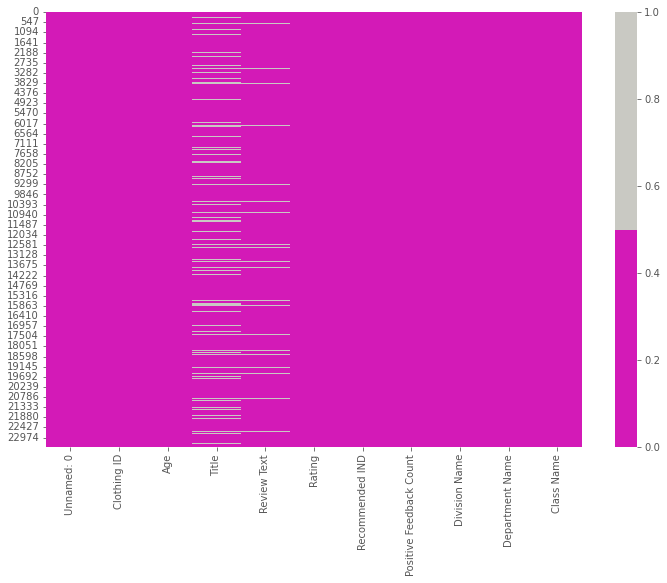

In [137]:
# Plot a heatmap of any missing data
#cols=df.columns[:11]   # all columns
colours=['#d31ab7', '#c9c9c3'] # specify the colours - yellow is missing. blue is not missing.#https://htmlcolorcodes.com/
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours)) 
#cmap – a matplotlib colormap name or object. This maps the data values to the color space.

In [138]:
# Try out a missing data percentage list! 
for col in df.columns:
    percent_missing=np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%


created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<AxesSubplot:xlabel='index'>

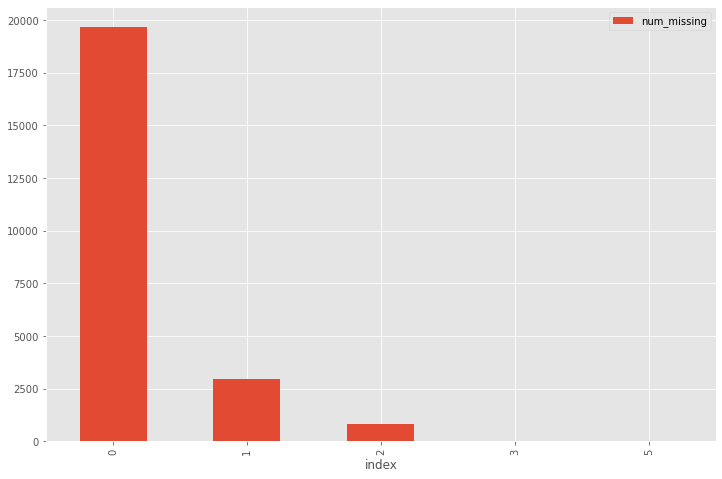

In [139]:
# Plot a missing data histogram
# first create missing indicator for features with missing data

for col in df.columns:
    missing=df[col].isnull()
    num_missing=np.sum(missing)
    if num_missing>0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
# then based on the indicator, plot the histogram of missing values

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')



Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [140]:
# Handle any missing data in your dataframe.
df["Review Text"].fillna("NaN" , inplace=True)

In [141]:
df["Review Text"].isnull().sum()

0

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

<AxesSubplot:>

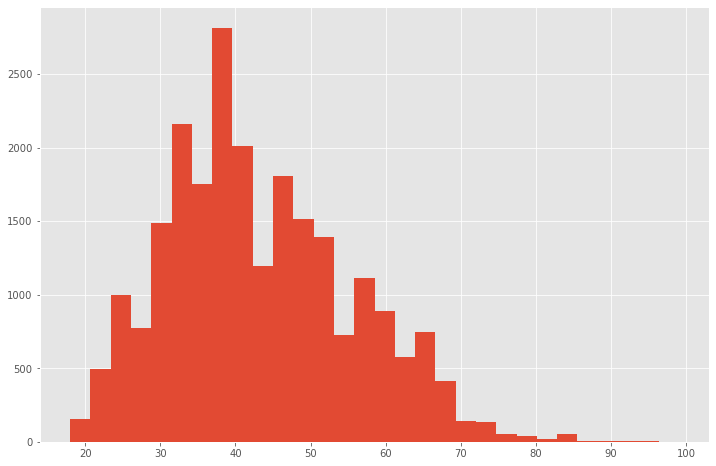

In [142]:
# Plot a histogram to see if there are any outliers.
df["Age"].hist(bins=30, figsize=(12, 8))

<AxesSubplot:>

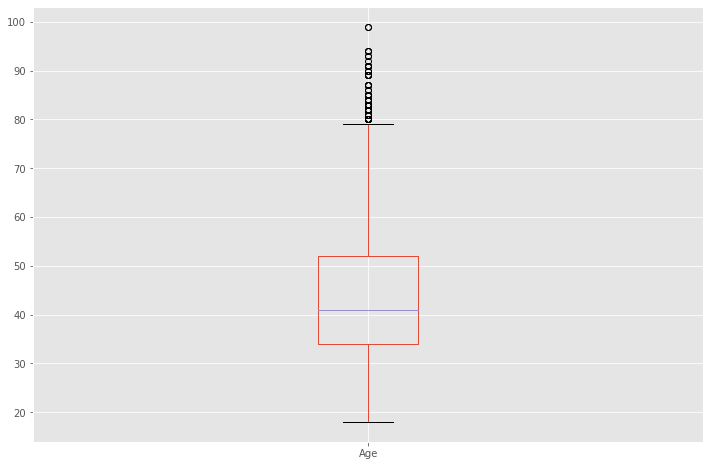

In [143]:
df.boxplot(column=['Age'])

In [144]:
# Use the describe() method
df["Age"].describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

<AxesSubplot:>

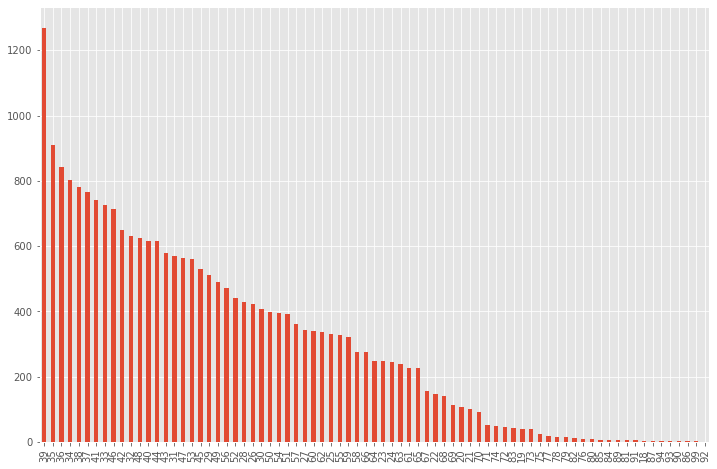

In [145]:
# Plot a bar chart
df['Age'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [146]:
# Handle any outliers in your dataframe
df.drop(df[df["Age"]>80].index, inplace=True)

<AxesSubplot:>

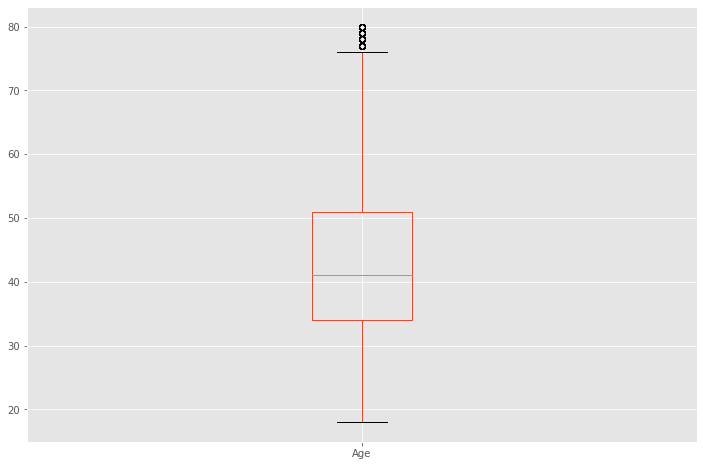

In [147]:
df.boxplot(column=['Age'])

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [152]:
# Look for any irrelevant data in the dataframe. How will you handle it?
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Review Text_ismissing: 96.39116%
False    22543
True       844
Name: Review Text_ismissing, dtype: int64

Division Name_ismissing: 99.94014%
False    23373
True        14
Name: Division Name_ismissing, dtype: int64

Department Name_ismissing: 99.94014%
False    23373
True        14
Name: Department Name_ismissing, dtype: int64

Class Name_ismissing: 99.94014%
False    23373
True        14
Name: Class Name_ismissing, dtype: int64



In [153]:
# Look for duplicates. How will you handle any duplicates?
df.duplicated().sum()

0

In [166]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?
df.drop(["Unnamed: 0"], axis=1).head()



,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_ismissing,Review Text_ismissing,Division Name_ismissing,Department Name_ismissing,Class Name_ismissing,num_missing
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,True,False,False,False,False,1
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,True,False,False,False,False,1
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,False,False,False,False,False,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,False,False,False,False,False,0
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,False,False,False,False,False,0


## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [176]:
# Try to convert all the strings in a column to lower or upper case. 
df["Class Name"]=df["Class Name"].str.upper()
#df["Class Name"].value_counts(dropna=False)

In [177]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title_ismissing,Review Text_ismissing,Division Name_ismissing,Department Name_ismissing,Class Name_ismissing,num_missing,Class_Name_Upper
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,INTIMATES,True,False,False,False,False,1,INTIMATES
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,DRESSES,True,False,False,False,False,1,DRESSES
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,DRESSES,False,False,False,False,False,0,DRESSES
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,PANTS,False,False,False,False,False,0,PANTS
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,BLOUSES,False,False,False,False,False,0,BLOUSES
